In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.formula.api as smf

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
print(os.getenv("PUIDATA"))

/nfshome/jz3525/PUIdata


In [4]:
df = pd.read_csv(os.getenv("PUIDATA") + '/NYCreal_estate_sales.csv')
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,EASE-MENT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APARTMENT_NUMBER,...,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE
0,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5391,65,,A3,22 BLUE HERON DRIVE,,...,1,0,1,8000,3000,1987,1,A3,1185000,3/19/18
1,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5395,19,,A1,4 EDWIN STREET,,...,1,0,1,7258,2230,1980,1,A1,866000,8/3/17
2,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5406,26,,A2,87 ELMBANK STREET,,...,1,0,1,5000,912,1950,1,A2,530000,4/27/18
3,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5407,10,,A2,112 ELMBANK STREET,,...,1,0,1,6242,1768,1975,1,A2,735000,11/7/17
4,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6205,15,,A5,95 EAGAN AVENUE,,...,1,0,1,1546,1579,1986,1,A5,475000,9/7/17


In [5]:
df = df[['YEAR_BUILT','GROSS_SQUARE_FEET','SALE_PRICE']]

In [6]:
df['YEAR_BUILT'] = pd.to_numeric(df['YEAR_BUILT'])
df['GROSS_SQUARE_FEET'] = pd.to_numeric(df['GROSS_SQUARE_FEET'])
df['SALE_PRICE'] = pd.to_numeric(df['SALE_PRICE'])
df.head()

,YEAR_BUILT,GROSS_SQUARE_FEET,SALE_PRICE
0,1987,3000,1185000
1,1980,2230,866000
2,1950,912,530000
3,1975,1768,735000
4,1986,1579,475000


In [7]:
#remove outliers
df = df[(df['GROSS_SQUARE_FEET'] <= 5000) & (df['GROSS_SQUARE_FEET'] > 0) & (df['SALE_PRICE'] <= 1500000) & (df['SALE_PRICE'] > 2000)]

In [8]:
model = smf.ols(formula = 'SALE_PRICE~GROSS_SQUARE_FEET-1',data = df).fit()

Text(0.5,1,'Correlation of Real Estate Gross Square Feet and Sale Price')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


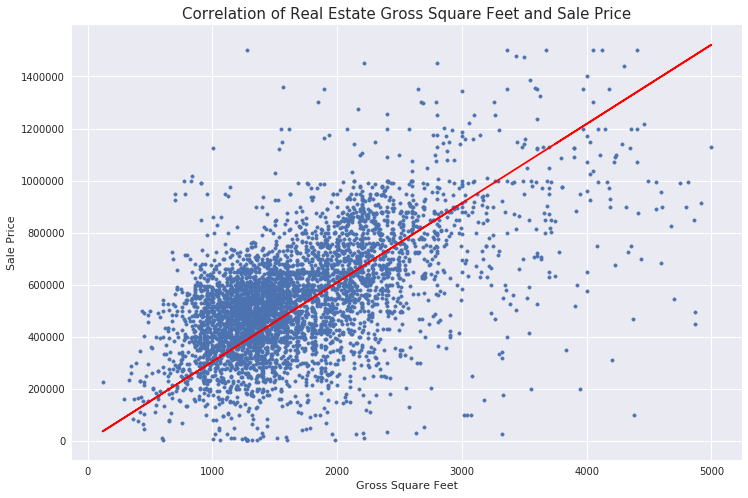

In [9]:
fig = plt.figure(figsize = (12,8))
fig.add_subplot(111)
plt.scatter(x = 'GROSS_SQUARE_FEET', y = 'SALE_PRICE', marker = '.',data = df)
plt.plot(df['GROSS_SQUARE_FEET'], model.fittedvalues, 'r-')
plt.xlabel('Gross Square Feet')
plt.ylabel('Sale Price')
plt.title('Correlation of Real Estate Gross Square Feet and Sale Price', fontsize = 15)